In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("CSUSHPISA.csv")

In [3]:
df.shape

(426, 2)

In [4]:
df.head(4)

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.735
3,1987-04-01,65.132


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       426 non-null    object 
 1   CSUSHPISA  426 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


In [6]:
df.isnull().sum()

DATE         0
CSUSHPISA    0
dtype: int64

## there is no null value in this data

In [7]:
df['Year']=df['DATE'].str.split('-').str[0]
df['Date']=df['DATE'].str.split('-').str[1]
df['Month']=df['DATE'].str.split('-').str[2]

In [8]:
df.head(4)

,DATE,CSUSHPISA,Year,Date,Month
0,1987-01-01,63.965,1987,01,01
1,1987-02-01,64.424,1987,02,01
2,1987-03-01,64.735,1987,03,01
3,1987-04-01,65.132,1987,04,01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       426 non-null    object 
 1   CSUSHPISA  426 non-null    float64
 2   Year       426 non-null    object 
 3   Date       426 non-null    object 
 4   Month      426 non-null    object 
dtypes: float64(1), object(4)
memory usage: 16.8+ KB


In [10]:
df['Year']=df['Year'].astype(int)
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       426 non-null    object 
 1   CSUSHPISA  426 non-null    float64
 2   Year       426 non-null    int32  
 3   Date       426 non-null    int32  
 4   Month      426 non-null    int32  
dtypes: float64(1), int32(3), object(1)
memory usage: 11.8+ KB


In [12]:
df=df.drop(columns=['DATE'])

In [13]:
df

,CSUSHPISA,Year,Date,Month
0,63.965,1987,1,1
1,64.424,1987,2,1
2,64.735,1987,3,1
3,65.132,1987,4,1
4,65.565,1987,5,1
...,...,...,...,...
421,290.371,2022,2,1
422,296.362,2022,3,1
423,301.409,2022,4,1
424,305.179,2022,5,1


In [14]:
df['current_year']=2022

In [15]:
df['No_of_Years']=df['current_year']-df['Year']

In [16]:
df=df.drop(columns=['current_year'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CSUSHPISA    426 non-null    float64
 1   Year         426 non-null    int32  
 2   Date         426 non-null    int32  
 3   Month        426 non-null    int32  
 4   No_of_Years  426 non-null    int64  
dtypes: float64(1), int32(3), int64(1)
memory usage: 11.8 KB


In [18]:
x=df.drop(columns=['CSUSHPISA'])
y=df['CSUSHPISA']

## MACHINE LEARNING

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [21]:
 rf.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
rf.score(x_test,y_test)

0.9991227534246128

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [24]:
tree_reg.score(x_test,y_test)

0.9994439121655576

In [25]:
y_pred = rf.predict(x_test)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CSUSHPISA'>

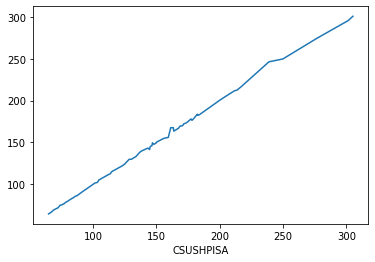

In [27]:
sns.lineplot(y_test,y_pred)

In [28]:
from sklearn.linear_model import LassoCV

In [29]:
lasscv = LassoCV()
lasscv.fit(x_train, y_train)

LassoCV()

In [30]:
lasscv.score(x_test,y_test)

0.823653372930248

In [31]:
y_pred = lasscv.predict(x_test)
y_pred

array([109.16708925, 140.49544979, 128.68155984, 187.81258724,
       125.56578904, 106.63893406,  62.14375961, 221.96291078,
        57.26514196,  97.17550657, 208.79609687, 124.97817342,
       120.39336358, 163.419499  ,  71.01957148, 216.79048532,
       160.597536  , 142.72979717, 206.1518266 ,  76.48580475,
       215.9090619 , 176.88012071, 118.92432455, 114.92713032,
       114.63332251,  80.77680678, 102.05412422,  95.70646753,
       184.69681644, 125.85959685, 187.51877943, 114.3395147 ,
       101.4665086 ,  54.9146795 , 136.20444776,  84.18638539,
       178.64296756, 113.75189909,  85.65542443,  50.62367747,
        60.08710496,  71.6071871 , 144.78645183, 211.61805987,
       145.37406744, 128.09394423,  59.79329715, 138.14498733,
       201.86082457,  52.0927165 , 201.56701676, 182.93396959,
       129.85679107, 218.84713997, 137.85117952, 169.76715568,
       145.08025963, 157.65945793, 188.98781847, 186.63735601,
        60.96852838, 221.66910297, 174.93958114, 143.31

C:\Users\aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CSUSHPISA'>

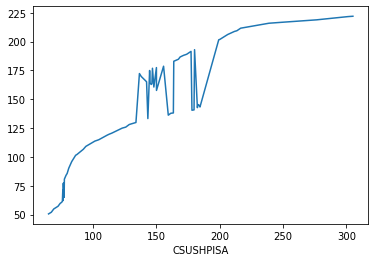

In [32]:
sns.lineplot(y_test,y_pred)

# Time Series Analysis

In [112]:
from datetime import datetime

In [113]:
df = pd.read_csv("CSUSHPISA.csv")

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       426 non-null    object 
 1   CSUSHPISA  426 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


In [115]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [116]:
df = df.set_index('DATE',drop = True)

## EDA

<AxesSubplot:xlabel='DATE'>

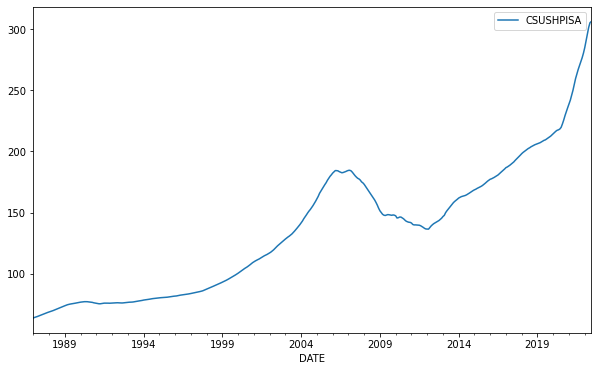

In [117]:
df.plot(figsize = (10,6))

## After 2006 it went down from the increment of 2002

<AxesSubplot:xlabel='DATE'>

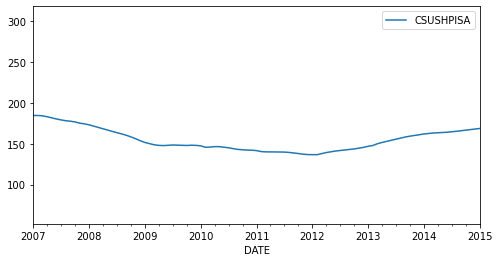

In [118]:
df.plot(xlim = ['2007-01-01','2015-01-01'],figsize =(8,4))

## After 2012 it started rise again and then it didn't fall down. After 6 years the price got up

In [119]:
df.resample(rule = 'A').agg(['min','max'])  ## resampling

CSUSHPISA         
                 min      max
DATE                         
1987-12-31    63.965   68.506
1988-12-31    68.859   73.465
1989-12-31    73.947   76.705
1990-12-31    76.184   77.297
1991-12-31    75.566   76.194
1992-12-31    76.086   76.674
1993-12-31    76.784   78.327
1994-12-31    78.592   80.297
1995-12-31    80.427   81.737
1996-12-31    81.835   83.722
1997-12-31    83.956   87.094
1998-12-31    87.616   92.713
1999-12-31    93.209   99.846
2000-12-31   100.552  109.140
2001-12-31   109.846  116.453
2002-12-31   117.143  127.622
2003-12-31   128.461  140.180
2004-12-31   141.646  159.330
2005-12-31   161.288  180.910
2006-12-31   182.320  184.364
2007-12-31   174.341  184.599
2008-12-31   153.618  173.133
2009-12-31   147.696  151.504
2010-12-31   142.061  147.395
2011-12-31   136.676  141.526
2012-12-31   136.529  145.502
2013-12-31   146.836  160.999
2014-12-31   161.950  168.061
2015-12-31   168.666  176.561
2016-12-31   177.305  185.702
2017-12-31   186.800  197.067
2018-12-31   198.214  205.906
2019-12-31   206.295  213.491
2020-12-31   214.537  235.776
2021-12-31   238.856  280.275
2022-12-31   284.833  306.181

<AxesSubplot:xlabel='DATE'>

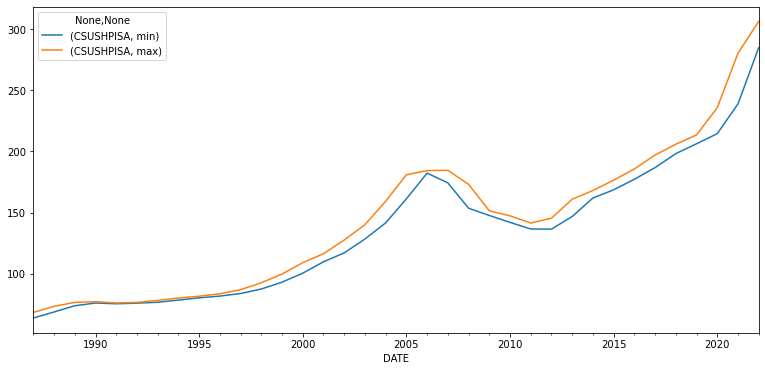

In [121]:
df.resample(rule = 'A').agg(['min','max']).plot()

## This is the yearly information we got with min and max csushpisa

In [122]:
df.resample(rule = 'QS').agg(['min','max'])

CSUSHPISA         
                 min      max
DATE                         
1987-01-01    63.965   64.735
1987-04-01    65.132   66.073
1987-07-01    66.508   67.331
1987-10-01    67.739   68.506
1988-01-01    68.859   69.639
...              ...      ...
2021-04-01   249.869  259.522
2021-07-01   263.300  270.212
2021-10-01   273.166  280.275
2022-01-01   284.833  296.362
2022-04-01   301.409  306.181

[142 rows x 2 columns]

<AxesSubplot:xlabel='DATE'>

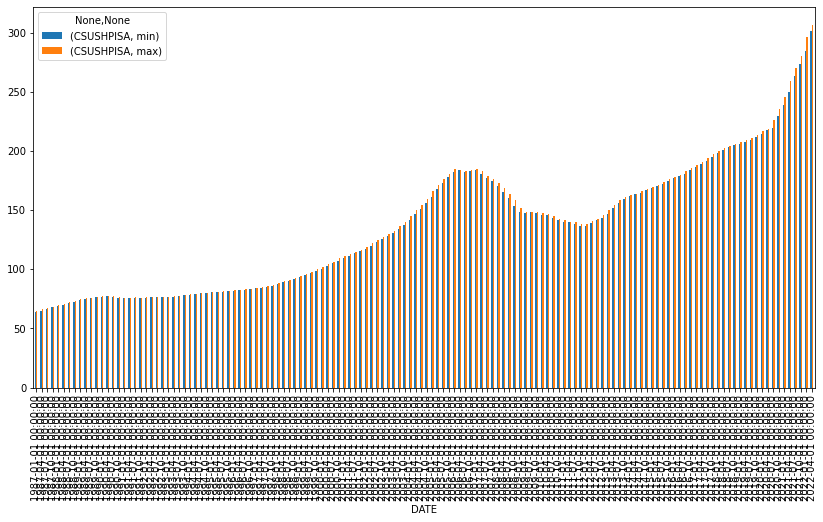

In [123]:
df.resample(rule = 'QS').agg(['min','max']).plot(kind='bar',figsize=(14,7))

## Maximum rise is in 2022

In [124]:
df.loc['2006-01-01':'2012-01-01'].mean()

CSUSHPISA    159.663397
dtype: float64

 ## This is the average CSUSHPISA during the fall

In [125]:
df.loc['2012-01-01':'2021-01-01'].mean()

CSUSHPISA    182.616908
dtype: float64

## This was the average CSUSHPISA after 2012 to 2021

In [126]:
df.loc['2022-01-01':].mean()

CSUSHPISA    297.389167
dtype: float64

## average CSUSHPISA after 2022 which gives the maximum hike

In [129]:
# decomposition
from statsmodels.tsa.seasonal import seasonal_decompose ,STL
plt.rcParams["figure.figsize"] = (10,6)

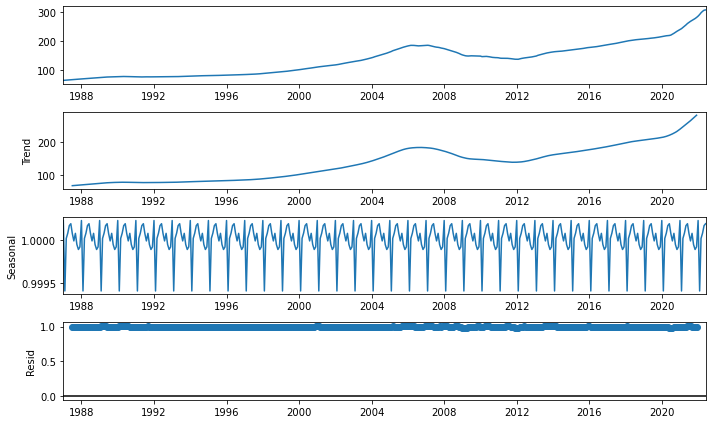

In [130]:
df_decomposed = seasonal_decompose(df,model='multiplicative')
df_decomposed.plot()
plt.show()

<AxesSubplot:xlabel='DATE'>

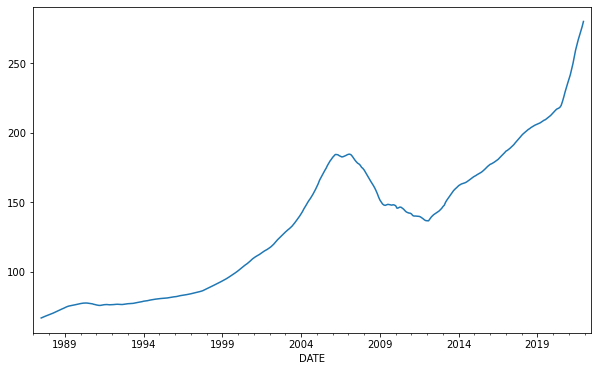

In [132]:
(df_decomposed.trend * df_decomposed.seasonal * df_decomposed.resid).plot()

In [133]:
# moving average
df['rolling 10 days'] = df['CSUSHPISA'].rolling(window=10,min_periods=1).mean() 


In [134]:
df['rolling 30 days'] = df['CSUSHPISA'].rolling(window=30,min_periods=1).mean()

df.plot()

<AxesSubplot:xlabel='DATE'>

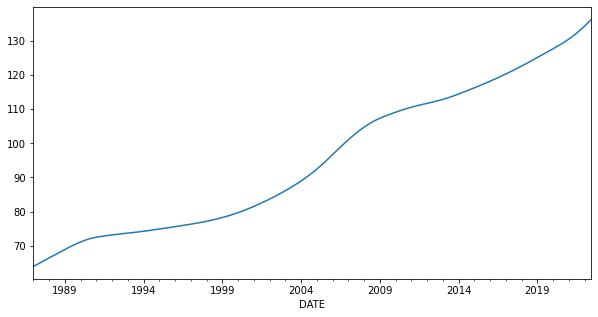

In [135]:
## Cummlative moving average

df['CSUSHPISA'].expanding().mean().plot(figsize=(10,5))

In [136]:
## exponential moving average

df['ema 5 day'] = df['CSUSHPISA'].ewm(span=5).mean()

<AxesSubplot:xlabel='DATE'>

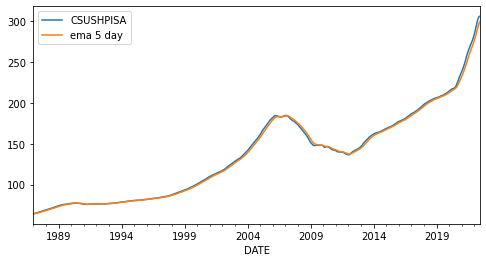

In [137]:
df[['CSUSHPISA','ema 5 day']].plot(figsize=(8,4))

## using dickey fuller test for verification of stationary data

In [138]:
from statsmodels.tsa.stattools import adfuller

In [139]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [140]:
adf_test(df['CSUSHPISA'])

ADF Statistics: 0.8372826801421579
p- value: 0.9922147564191345
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [141]:
## Using Technique Differencing
df['CSUSHPISA First differnce']=df['CSUSHPISA']-df['CSUSHPISA'].shift(1)

In [142]:
df.head()

,CSUSHPISA,rolling 10 days,rolling 30 days,ema 5 day,CSUSHPISA First differnce
DATE,,,,,
1987-01-01,63.965,63.965000,63.965000,63.965000,NaN
1987-02-01,64.424,64.194500,64.194500,64.240400,0.459
1987-03-01,64.735,64.374667,64.374667,64.474684,0.311
1987-04-01,65.132,64.564000,64.564000,64.747723,0.397
1987-05-01,65.565,64.764200,64.764200,65.061464,0.433


In [143]:
adf_test(df['CSUSHPISA First differnce'].dropna())

ADF Statistics: -3.5820576825135313
p- value: 0.006113457615210817
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [144]:
## Using second Time Differencing
df['CSUSHPISA Second Difference']=df['CSUSHPISA First differnce']-df['CSUSHPISA First differnce'].shift(1)

In [145]:
adf_test(df['CSUSHPISA Second Difference'].dropna())

ADF Statistics: -5.091620176119649
p- value: 1.457323514862507e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [146]:
### for 12 months 
## Using Technique Differencing
df['CSUSHPISA 12 Difference']=df['CSUSHPISA']-df['CSUSHPISA'].shift(12)

In [147]:
adf_test(df['CSUSHPISA 12 Difference'].dropna())

ADF Statistics: -1.9521045406033892
p- value: 0.30796006448127167
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [148]:
### for 12 months 
## Using second Time Differencing
df['CSUSHPISA second 12 Difference']=df['CSUSHPISA 12 Difference']-df['CSUSHPISA 12 Difference'].shift(12)

In [149]:
adf_test(df['CSUSHPISA second 12 Difference'].dropna())

ADF Statistics: -4.652496144128007
p- value: 0.00010325475480390055
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [150]:
### for 12 months 
## Using third Time Differencing
df['CSUSHPISA third 12 Difference']=df['CSUSHPISA second 12 Difference']-df['CSUSHPISA second 12 Difference'].shift(12)

In [151]:
adf_test(df['CSUSHPISA third 12 Difference'].dropna())

ADF Statistics: -5.67467191201824
p- value: 8.760287982914791e-07
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [152]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

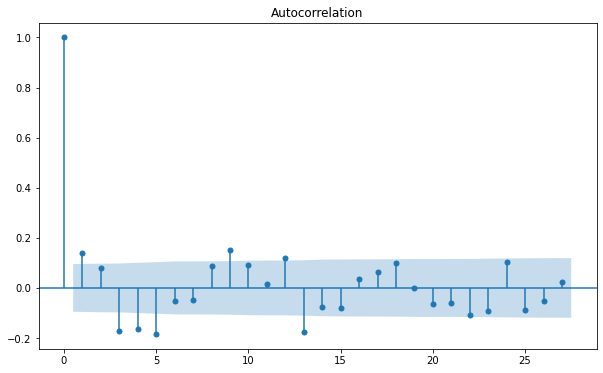

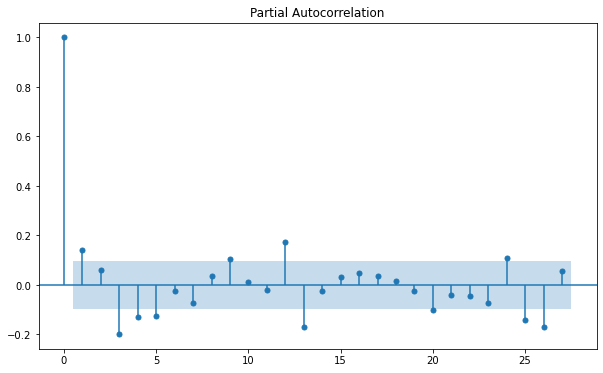

In [153]:
acf = plot_acf(df["CSUSHPISA Second Difference"].dropna())
pcf = plot_pacf(df["CSUSHPISA Second Difference"].dropna())

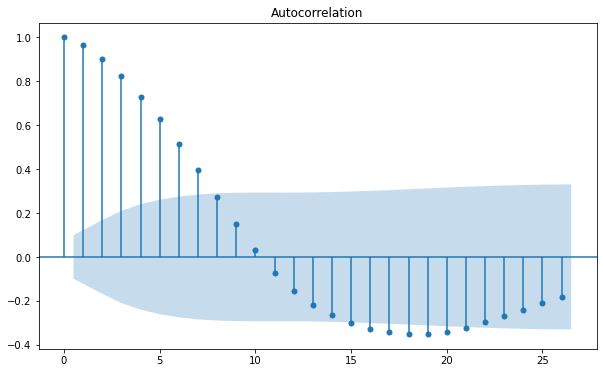

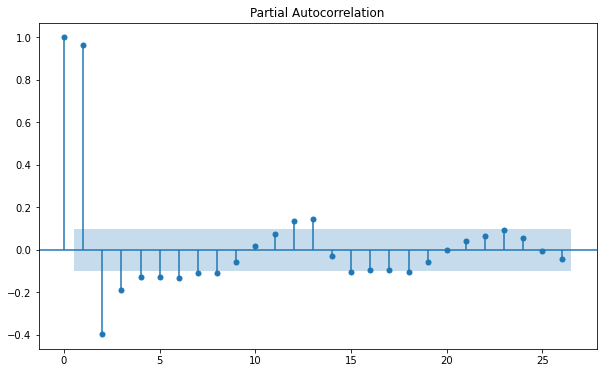

In [154]:
acf12 = plot_acf(df["CSUSHPISA third 12 Difference"].dropna())
pacf12 = plot_pacf(df["CSUSHPISA third 12 Difference"].dropna())

## Model building

In [155]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2015,12,1)
test_dataset_end=datetime(2022,12,1)

In [156]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [157]:
# prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

### Using SARIMAX

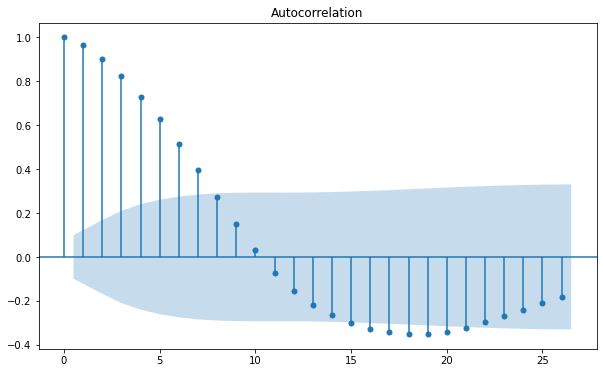

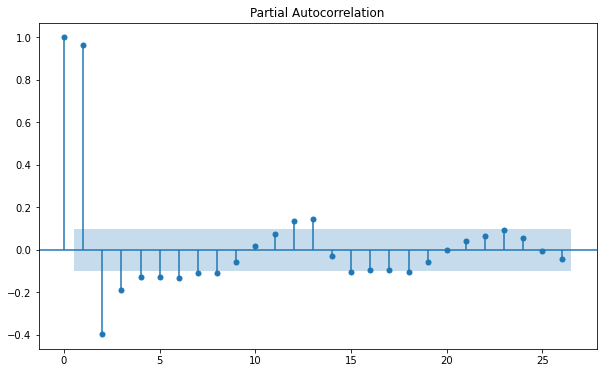

In [158]:
acf12 = plot_acf(df["CSUSHPISA third 12 Difference"].dropna())
pacf12 = plot_pacf(df["CSUSHPISA third 12 Difference"].dropna())

In [159]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [160]:
model_SARIMA=SARIMAX(train_data['CSUSHPISA'],order=(8,3,8),seasonal_order=(0,0,0,12))

C:\Users\aditya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aditya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [161]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [162]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CSUSHPISA   No. Observations:                  348
Model:               SARIMAX(8, 3, 8)   Log Likelihood                   2.110
Date:                Thu, 01 Sep 2022   AIC                             29.780
Time:                        22:38:19   BIC                             95.120
Sample:                    01-01-1987   HQIC                            55.802
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9485      0.146     -6.506      0.000      -1.234      -0.663
ar.L2         -0.4530      0.170     -2.664      0.008      -0.786      -0.120
ar.L3          0.1296      0.094      1.375      0.169      -0.055       0.314
ar.L4          0.0006      0.088      0.007      0.994      -0.172       0.173
ar.L5         -0.9174      0.079    -11.617      0.000      -1.072      -0.763
ar.L6         -0.7289      0.159     -4.594      0.000      -1.040      -0.418
ar.L7         -0.5881      0.141     -4.176      0.000      -0.864      -0.312
ar.L8         -0.1853      0.046     -4.051      0.000      -0.275      -0.096
ma.L1         -0.0747      0.151     -0.493      0.622      -0.371       0.222
ma.L2         -0.4664      0.185     -2.522      0.012      -0.829      -0.104
ma.L3         -0.7577      0.169     -4.496      0.000      -1.088      -0.427
ma.L4          0.2055      0.102      2.016      0.044       0.006       0.405
ma.L5          0.9678      0.107      9.029      0.000       0.758       1.178
ma.L6         -0.1390      0.142     -0.982      0.326      -0.417       0.139
ma.L7         -0.2682      0.141     -1.902      0.057      -0.545       0.008
ma.L8         -0.4627      0.155     -2.987      0.003      -0.766      -0.159
sigma2         0.0566      0.005     11.888      0.000       0.047       0.066
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1383.19
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              31.87   Skew:                             1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [163]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2016-01-01 00:00:00
2022-06-01 00:00:00


In [164]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2016,1,1),end=datetime(2022,5,1))
residuals=test_data['CSUSHPISA']-pred_Sarima

C:\Users\aditya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='DATE'>

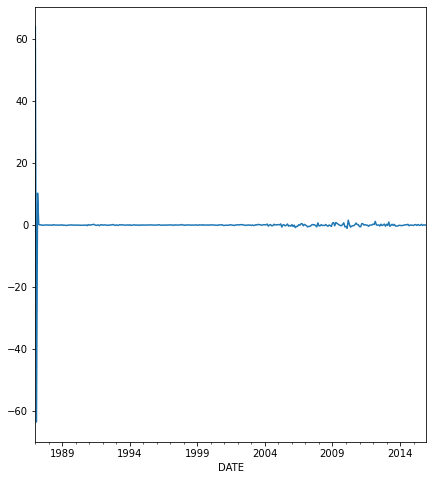

In [165]:
model_SARIMA_fit.resid.plot(figsize=(7,8))

<AxesSubplot:ylabel='Density'>

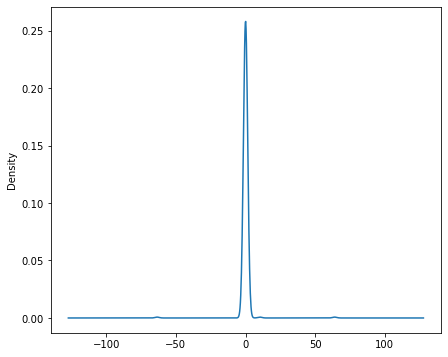

In [166]:
model_SARIMA_fit.resid.plot(kind='kde',figsize=(7,6))

In [167]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\aditya\AppData\Local\Temp/ipykernel_10288/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [168]:
test_data

,CSUSHPISA,rolling 10 days,rolling 30 days,ema 5 day,CSUSHPISA First differnce,CSUSHPISA Second Difference,CSUSHPISA 12 Difference,CSUSHPISA second 12 Difference,CSUSHPISA third 12 Difference,Predicted_SARIMA
DATE,,,,,,,,,,
2016-01-01,177.305,173.5978,167.184533,175.680874,0.744,-0.069,8.639,1.923,10.321,177.367846
2016-02-01,177.664,174.3332,167.874267,176.341916,0.359,-0.385,8.527,1.920,10.059,177.992125
2016-03-01,178.185,175.0624,168.539333,176.956277,0.521,0.162,8.377,1.661,8.072,178.661057
2016-04-01,178.794,175.7967,169.190933,177.568852,0.609,0.088,8.484,1.573,6.540,179.341259
2016-05-01,179.458,176.5303,169.837033,178.198568,0.664,0.055,8.565,1.338,4.923,180.054520
...,...,...,...,...,...,...,...,...,...,...
2022-02-01,290.371,271.9682,240.340533,281.505689,5.538,0.980,48.503,22.196,4.731,237.207593
2022-03-01,296.362,276.1519,243.189867,286.457793,5.991,0.453,50.660,21.497,1.710,238.072468
2022-04-01,301.409,280.3406,246.183433,291.441528,5.047,-0.944,51.540,18.979,-4.103,238.904639


<AxesSubplot:xlabel='DATE'>

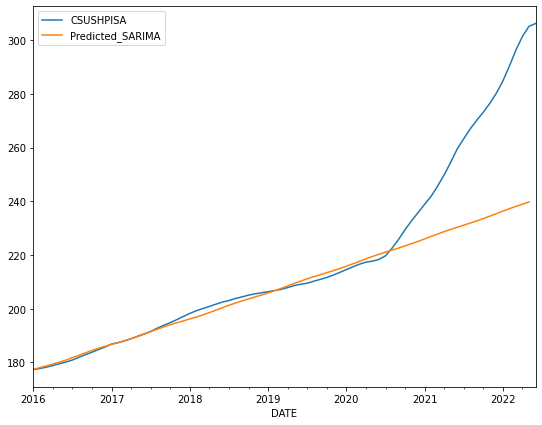

In [170]:
test_data[['CSUSHPISA','Predicted_SARIMA']].plot(figsize = (9,7))

###  I have used Sarimax because it is a seasonal data